## Notes on how to use this note book for the future:

The data frame 'input_data_ordered_raw' has both the additive trait and the measured values inferred via mutual information maximimzation, on the balanced set. So import this first of all. 

Then go down to the heading which says "Import linear trait and labels" and run that cell. After that the subsequent plots can be made


### Import libraries and read data

In [34]:
import pandas as pd
import numpy as np
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sys

#input_data_ordered_raw =  pd.read_csv('rnap_scanned_over_ecoli_genome200k.csv')
#input_data_ordered_raw = pd.read_csv('global_epistasis_RNA_splicing/high_val_rna_seq_measurments.csv')
input_data_ordered_raw = pd.read_csv('../../../global_epistasis_RNA_splicing/balanced_rna_splice_df.csv')

# remove nan's
input_data_ordered_raw = input_data_ordered_raw.dropna()

In [6]:
del input_data_ordered_raw['Unnamed: 0']
input_data_ordered_raw.head()

,measurements_scaled_0_1,seq_rna,val_scaled
0,0.737186,AAAGUAAGA,0.806642
1,0.738149,AAAGUAAGC,0.816299
2,0.699324,AAAGUAAGG,0.814734
3,0.523931,AAAGUAAGU,0.856104
4,0.250872,AAAGUACGA,0.732277


In [10]:
len(input_data_ordered_raw)

2198

In [11]:
#len_of_data_to_use = 10000
#sequences = input_data_ordered_raw['seq'][0:len_of_data_to_use]
#val = input_data_ordered_raw['val'][0:len_of_data_to_use]

sequences = input_data_ordered_raw['seq_rna']
val = input_data_ordered_raw['measurements_scaled_0_1']

In [12]:
len(sequences)

2198

In [13]:
rna_splice_df = pd.DataFrame({'seq_rna':sequences,'val':val})
#gb1_df_10k.to_csv('gb1_10k.csv',sep='\t')

In [14]:
rna_splice_df.head()

,seq_rna,val
0,AAAGUAAGA,0.737186
1,AAAGUAAGC,0.738149
2,AAAGUAAGG,0.699324
3,AAAGUAAGU,0.523931
4,AAAGUACGA,0.250872


In [ ]:
#rna_splice_df.to_csv('rna_splice_df_balanced.csv',sep='\t')

## Get percentiles column from values

In [ ]:
from scipy.stats import percentileofscore

# generate example data
arr = rna_splice_df['val']

# pre-sort array
arr_sorted =  sorted(arr)

# calculate percentiles using scipy func percentileofscore on each array element
s = pd.Series(arr)
percentiles = s.apply(lambda x: percentileofscore(arr_sorted, x))

In [ ]:
val_scaled = percentiles
val_scaled = (val_scaled-min(val_scaled))/(max(val_scaled)-min(val_scaled))
rna_splice_df['val_scaled'] = val_scaled

In [ ]:
bins_to_use = 20
#counts,bins = np.histogram(gb1_df_10k['val'],bins=bins_to_use)
counts,bins = np.histogram(val_scaled,bins=bins_to_use)

In [ ]:
bins

In [ ]:
temp_df = rna_splice_df.copy()

In [ ]:
temp_df.head()

In [ ]:
for bin_index in range(len(bins)):
    if(bin_index<len(bins)-1):
        print(bin_index,bins[bin_index],bins[bin_index+1]) 

## Get sequences and bin numbers

In [ ]:
sequence_bins_list = []
# loop over every sequence
for index, row in temp_df.iterrows():
    # for each row, put sequences in the correct bin based on comparing values to bins
    #print(index,row['seq'], row['val'])
    for bin_index in range(len(bins)):
        if(bin_index<len(bins)-1): # do go out of bounds
            if((row['val_scaled']>= bins[bin_index]) and (row['val_scaled']<=bins[bin_index+1])):
                #print('Seq: ',row['seq'],' going in bin: ',bin_index)
                sequence_bins_list.append([row['seq_rna'],bin_index])


In [ ]:
sequence_counts_array = np.array(sequence_bins_list)

In [ ]:
len(sequence_counts_array)

In [ ]:
sequence_counts_array[:,1]
seq_bin_df = pd.DataFrame({'seq_rna':sequence_counts_array[:,0],'bin':sequence_counts_array[:,1]})
seq_bin_df.head()

In [ ]:
print(min(sequence_counts_array[:,1].astype('int')))
print(max(sequence_counts_array[:,1].astype('int')))

In [ ]:
count_cols = []
for bin_index in range(len(bins)-1):
    count_cols.append('ct_'+str(bin_index))

In [ ]:
count_cols

In [ ]:
# append count columns to the dataframe
#c ount_cols are ['ct_0','ct_1','ct_2','ct_3','ct_4','ct_5','ct_6','ct_7','ct_8','ct_9'] for bins = 10
d = dict.fromkeys(count_cols, 0)
seq_counts_df = seq_bin_df.assign(**d).copy()

In [ ]:
seq_counts_df.head(10)

## populate counts columns

In [ ]:
number_cols_to_displace = 2

for row_index in range(len(seq_counts_df['bin'])):
    count_col = seq_counts_df.columns[int(seq_counts_df['bin'][row_index])+number_cols_to_displace]
    seq_counts_df.loc[row_index,count_col] = 1

    

In [ ]:
seq_counts_df.head(10)

In [ ]:
len(temp_df['val_scaled'])

## Write dataframe to file to be evaluated by mpathic

In [ ]:
seq_counts_df.to_csv('rna_mpathic_high_val_format_20_ct.csv',sep='\t')

In [ ]:
import os
os.getcwd()

In [ ]:
#eval_model_df = pd.read_csv('/Users/tareen/Desktop/Desktop_Tests/MPathic3/evaluated_rna_model_gf_high_val_20_ct.csv')
eval_model_df = pd.read_csv('/Users/tareen/Desktop/Desktop_Tests/MPathic3/evaluated_rna_model_gf_balanced_val_20_ct.csv')



In [ ]:
del eval_model_df['Unnamed: 0']

In [ ]:
# scale predicted value between 0 and 1
val_scaled_eval = eval_model_df['val']
val_scaled_eval = (val_scaled_eval-min(val_scaled_eval))/(max(val_scaled_eval)-min(val_scaled_eval))
eval_model_df['val_scaled'] = val_scaled_eval

eval_model_df.head()

In [ ]:
eval_model_df.to_csv('evaluated_balanced_rna_df.csv')

In [ ]:
#plt.figure(figsize=[5,6])

# gather counts/ticks vs. predictions data
list_of_counts_lists = []
medians_vs_bin = []

# loop over ct_# columns
for ct_col_index in range(len(bins)-1):        
    
    # create temporary list and append it to list of lists
    temp_list = []
    # loop over all rows the current column
    for line_index in range(len(eval_model_df)):
        
        if(eval_model_df['ct_'+str(ct_col_index)][line_index]==1):
            
            temp_list.append(eval_model_df['val_scaled'][line_index])
    
    list_of_counts_lists.append(temp_list)
    
fig, ax = plt.subplots(nrows=len(bins)-1,sharex=True, ncols=1,figsize=(9,6))    

ax[0].set_title('RNA splice data')

# make subplots
for ct_col_index in range(len(bins)-1):

    for xc in list_of_counts_lists[len(bins)-2-ct_col_index]:
        
        ax[ct_col_index].axvline(x=xc,alpha=0.25,linewidth=1)
        
    ax[ct_col_index].axvline(x=np.mean(list_of_counts_lists[len(bins)-2-ct_col_index]),linewidth=3,color='red')    
    #ax[ct_col_index].set_ylabel('ct_'+str(len(bins)-2-ct_col_index))
    ax[ct_col_index].set_ylabel(str(len(bins)-2-ct_col_index))
    ax[ct_col_index].set_yticks([])
    medians_vs_bin.append(np.median(list_of_counts_lists[len(bins)-2-ct_col_index]))

# put x label under last panel
ax[ct_col_index].set_xlabel('Model Prediction (scaled to [0-1])')    
fig.text(0.06, 0.5, 'Bin Number', ha='center', va='center', rotation='vertical')

#plt.tight_layout() 


In [ ]:
#plt.plot(medians_vs_bin,'ro')
temp_list = medians_vs_bin.copy()

In [ ]:
temp_list = np.array(temp_list)
temp_list = (temp_list-min(temp_list))/(max(temp_list)-min(temp_list))

In [ ]:
list_of_temp_list = []
list_of_temp_list.append(np.linspace(0,1,20))
list_of_temp_list.append(temp_list)

In [ ]:
plt.plot(-temp_list,'o')

## Learned Model

In [141]:
learned_model_IM = pd.read_csv('/Users/tareen/Desktop/Desktop_Tests/MPathic3/learned_and_evaluated_models/RNA_learned_model_balanced_IM.csv',sep='\t')
del learned_model_IM['Unnamed: 0']
learned_model_IM

,pos,val_A,val_C,val_G,val_U
0,0,-0.078972,-0.051188,0.061471,0.068689
1,1,-0.203426,0.002910,0.084727,0.115788
2,2,0.052382,0.092077,-0.342719,0.198259
3,3,-0.040992,-0.121456,0.098853,0.063595
4,4,-0.222908,0.328005,0.162786,-0.267883
5,5,-0.290717,0.183432,-0.026662,0.133946
6,6,-0.186569,0.009599,0.081157,0.095812
7,7,0.075548,0.106820,-0.279431,0.097063
8,8,0.035134,0.041183,0.025890,-0.102206


## Fix Gauge

In [65]:
# fix the gauge of the learned model

row_means_list = []
for mean_index in range(len(learned_model_IM)):
    row_means_list.append(np.mean(learned_model_IM.loc[mean_index,:]))
    learned_model_IM.loc[mean_index,:] = learned_model_IM.loc[mean_index,:]-row_means_list[mean_index]

In [142]:
learned_model_IM_drop_3 = learned_model_IM.copy()
learned_model_IM_drop_3 = learned_model_IM_drop_3.drop([3])

In [143]:
learned_model_IM_drop_3 = learned_model_IM_drop_3.reset_index()
learned_model_IM_drop_3

,index,pos,val_A,val_C,val_G,val_U
0,0,0,-0.078972,-0.051188,0.061471,0.068689
1,1,1,-0.203426,0.002910,0.084727,0.115788
2,2,2,0.052382,0.092077,-0.342719,0.198259
3,4,4,-0.222908,0.328005,0.162786,-0.267883
4,5,5,-0.290717,0.183432,-0.026662,0.133946
5,6,6,-0.186569,0.009599,0.081157,0.095812
6,7,7,0.075548,0.106820,-0.279431,0.097063
7,8,8,0.035134,0.041183,0.025890,-0.102206


In [144]:
learned_model_IM_drop_3 = learned_model_IM_drop_3[[ 'val_A', 'val_C', 'val_G', 'val_U']]

In [145]:
# fix guage of smaller matrix
row_means_list = []
for mean_index in range(len(learned_model_IM_drop_3)):
    row_means_list.append(np.mean(learned_model_IM_drop_3.loc[mean_index,:]))
    learned_model_IM_drop_3.loc[mean_index,:] = learned_model_IM_drop_3.loc[mean_index,:]-row_means_list[mean_index]

/usr/local/Cellar/python3/3.6.2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/Cellar/python3/3.6.2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [155]:
df = learned_model_IM_drop_3[[ 'val_A', 'val_C', 'val_G', 'val_U']]
normalized_df=(df-df.min())/(df.max()-df.min())
#normalized_df=(df-df.mean())/(df.std())



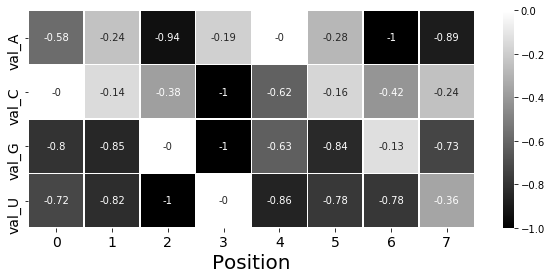

In [156]:
import seaborn as sns
plt.figure(figsize=[10,4])
#sns.heatmap(learned_model_IM_drop_3_4[[ 'val_A', 'val_C', 'val_G', 'val_U']].T,cmap='RdBu',linewidths=.5)
#sns.heatmap(-learned_model_IM_drop_3[[ 'val_A', 'val_C', 'val_G', 'val_U']].T,cmap='gray',linewidths=.5,annot=True)
sns.heatmap(-normalized_df[[ 'val_A', 'val_C', 'val_G', 'val_U']].T,cmap='gray',linewidths=.5,annot=True)
plt.xlabel('Position',fontsize=20)
plt.tick_params(labelsize=14)
#plt.savefig('RNA_splice_learned_model_IM_balanced_scaled_for_talk.pdf')
plt.show()

In [8]:
#rna_splice_df_measurement_vs_pred = pd.read_csv('rna_splice_df_high_val.csv')
rna_splice_df_measurement_vs_pred = pd.read_csv('../../../global_epistasis_RNA_splicing/balanced_rna_splice_df.csv')
del rna_splice_df_measurement_vs_pred['Unnamed: 0']

In [9]:
rna_splice_df_measurement_vs_pred.head()

,measurements_scaled_0_1,seq_rna,val_scaled
0,0.737186,AAAGUAAGA,0.806642
1,0.738149,AAAGUAAGC,0.816299
2,0.699324,AAAGUAAGG,0.814734
3,0.523931,AAAGUAAGU,0.856104
4,0.250872,AAAGUACGA,0.732277


In [10]:
rna_linear_trait = input_data_ordered_raw['val_scaled']
rna_true_labels = input_data_ordered_raw['measurements_scaled_0_1']

rna_linear_trait_scaled = rna_linear_trait.values
#rna_linear_trait_scaled = (rna_linear_trait_scaled-min(rna_linear_trait_scaled))/(max(rna_linear_trait_scaled)-min(rna_linear_trait_scaled))

## Import linear trait and labels

In [35]:
rna_linear_trait = input_data_ordered_raw['val_scaled']
rna_true_labels = input_data_ordered_raw['measurements_scaled_0_1']

rna_linear_trait_scaled = rna_linear_trait.values

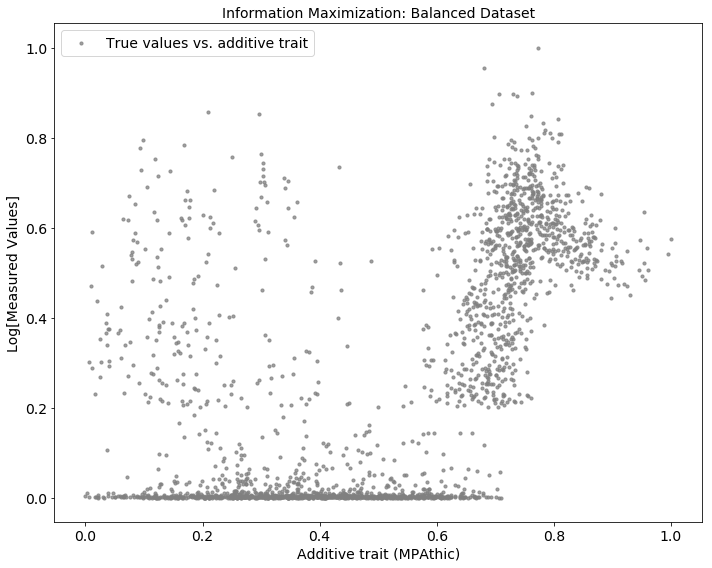

In [36]:

figure_size = [10,8]
plt.figure(figsize=figure_size)
#plt.xlim([-0.311,-0.306])
#plt.ylim([-9,0.01])

#plt.scatter(-(np.array(list_of_temp_list[1])),np.log(np.array(list_of_temp_list[0])[::-1]/1.3+1e-10),color='black',s=30,zorder=0,label='Measurment bins vs. prediction medians')

plt.scatter(rna_linear_trait,rna_true_labels,s=10,alpha=0.75,color='gray', label='True values vs. additive trait',zorder=1)
#plt.scatter(rna_linear_trait,np.log(rna_true_labels+1e-10),s=10,alpha=0.75,color='gray', label='True values vs. additive trait',zorder=1)
#plt.plot(medians_vs_bin)
plt.xlabel('Additive trait (MPAthic)',fontsize=14)
#plt.ylim([-10,0.0])
plt.ylabel('Log[Measured Values]',fontsize=14)
plt.tick_params(labelsize=14)
plt.legend(fontsize=14)
plt.title('Information Maximization: Balanced Dataset',fontsize=14)
#plt.savefig('RNA_splice_measured_vs_additive_IM.pdf')
#plt.savefig('RNA_splice_measured_vs_additive_IM_with_mpathic_pred_balanced.png')
plt.tight_layout()
plt.show()

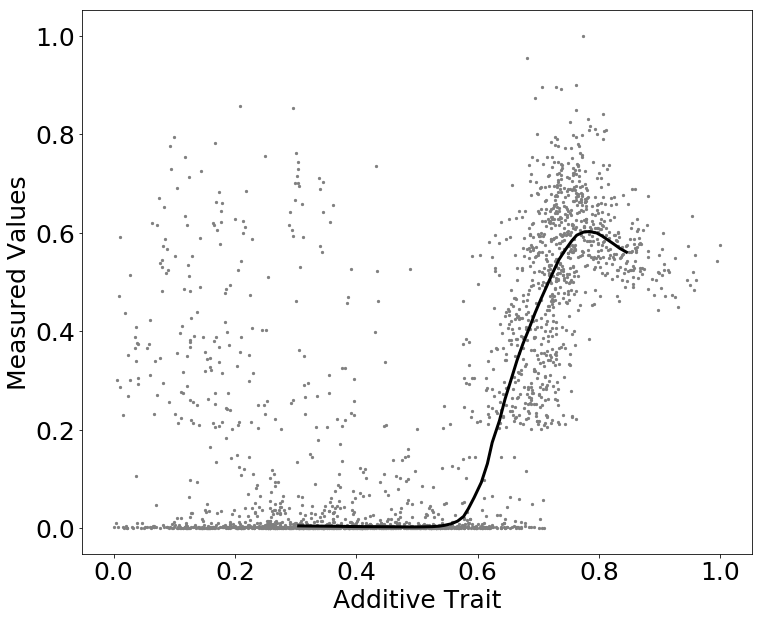

In [39]:
x = rna_linear_trait
y = rna_true_labels


# aggregate
# https://stackoverflow.com/questions/23217851/running-median-of-y-values-over-a-range-of-x
# smoothing:
# https://stackoverflow.com/questions/5283649/plot-smooth-line-with-pyplot

import pandas as pd
from scipy.ndimage.filters import gaussian_filter1d
df = pd.DataFrame({'X' : x, 'Y' : y})  #we build a dataframe from the data

data_cut = pd.cut(df.X,100)           #we cut the data following the bins
grp = df.groupby(by = data_cut)        #we group the data by the cut

ret = grp.aggregate(np.median)         #we produce an aggregate representation (median) of each bin

#plotting
plt.figure(figsize=[12,10])
plt.scatter(df.X,df.Y,color='gray',alpha=1,s=5)
ysmoothed = gaussian_filter1d(ret.Y, sigma=3)
#plt.plot(ret.X,ret.Y,'ro',lw=2,alpha=.5,)
plt.plot(ret.X[30:100], ysmoothed[30:100],lw=3,color='black')


plt.xlabel('Additive Trait',fontsize=25)
plt.ylabel('Measured Values',fontsize=25)
#plt.title('RNA Splice using Information Maximization',fontsize=16)
plt.tick_params(labelsize=25)
plt.savefig('rna_splice_ge_smoothed_line_im_scaled_for_talk.png')


plt.show()

/Users/tareen/Library/Python/3.6/lib/python/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


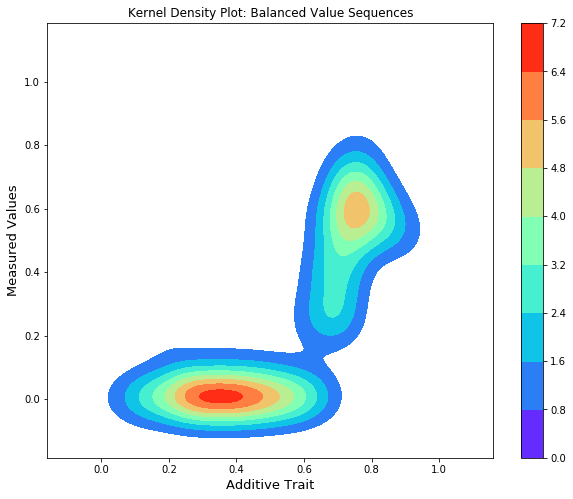

In [3]:
import matplotlib.pyplot as pl
import seaborn as sns

figure_size = [10,8]
pl.figure(figsize=figure_size)

#ax = sns.kdeplot(rna_linear_trait, np.log(rna_true_labels+1e-10),gridsize=200, shade = True, cmap = "rainbow",cbar=True)
ax = sns.kdeplot(rna_linear_trait, rna_true_labels,gridsize=200, shade = True, cmap = "rainbow",cbar=True)
#ax.patch.set_facecolor('white')
ax.collections[0].set_alpha(0.0)
ax.set_xlabel('Additive Trait', fontsize = 13)
ax.set_ylabel('Measured Values', fontsize = 13)
ax.set_title('Kernel Density Plot: Balanced Value Sequences')
#pl.xlim(-2, 2)
#figure_size = [10,8]
#fig.figure(figsize=figure_size)
#pl.ylim([-10, 2])
#pl.scatter(eval_model_df['val'],np.log(rna_true_labels),s=10,alpha=0.9,color='gray', zorder=1)
#pl.xlabel('Additive Trait', fontsize = 13)
#pl.ylabel('Measured Values', fontsize = 13)
pl.show()



## Sequences Logos

In [ ]:
eval_model_df['val']

In [ ]:
import sys
sys.path.insert(0,'/Users/tareen/Desktop/Desktop_Tests/logomaker3')
import logomaker

In [ ]:
rna_splice_df_measurement_vs_pred.columns

In [ ]:
seq_measurments = rna_splice_df_measurement_vs_pred[['val','seq_rna']].copy()

In [ ]:
all_seqs = pd.DataFrame({'seqs':seq_measurments['seq_rna']})
loaded_alignment_all_seqs = logomaker.load_alignment(sequences = all_seqs['seqs'])

import warnings
warnings.filterwarnings("ignore")

logo_all_seqs = logomaker.make_logo(
                            dataframe=loaded_alignment_all_seqs,
                            matrix_type='probability',
                            sequence_type='RNA',
                            ytick_format='%0.1f',
                            draw_now=True,
                            figsize=[12,3],
                            #ylim=[0,0.5]
                    )



## Evaluated model on full dataset

In [8]:
bal_model_eval_full_dataset = pd.read_csv('/Users/tareen/Desktop/Desktop_Tests/MPathic3/learned_and_evaluated_models/balanced_model_eval_on_full_rna1.csv')
rna_true_labels_full = bal_model_eval_full_dataset['measurements_0_1'].values
rna_linear_trait_full = bal_model_eval_full_dataset['val_pred'].values
bal_model_eval_full_dataset.head()
#bal_model_eval_full_dataset['measurements_0_1']
# remove nan's
#bal_model_eval_full_dataset = bal_model_eval_full_dataset.dropna()

,seq_rna,measurements_0_1,val_pred
0,AAAGCAAAA,0.001231,-0.169762
1,AAAGCAAAC,0.002831,-0.163712
2,AAAGCAAAG,0.001143,-0.179006
3,AAAGCAAAU,0.001261,-0.307102
4,AAAGCAACA,0.001963,-0.138490


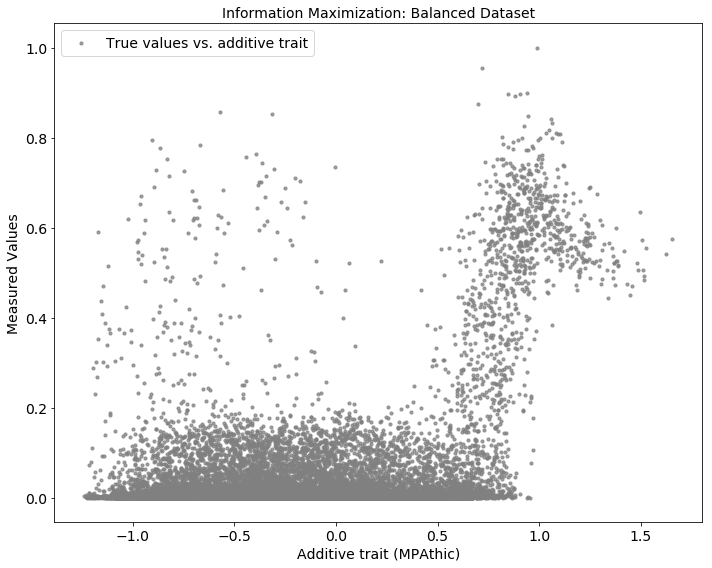

In [9]:

figure_size = [10,8]
plt.figure(figsize=figure_size)
#plt.xlim([-0.311,-0.306])
#plt.ylim([-9,0.01])


plt.scatter(-rna_linear_trait_full,rna_true_labels_full,s=10,alpha=0.75,color='gray', label='True values vs. additive trait',zorder=1)

plt.xlabel('Additive trait (MPAthic)',fontsize=14)
#plt.ylim([-10,0.0])
plt.ylabel('Measured Values',fontsize=14)
plt.tick_params(labelsize=14)
plt.legend(fontsize=14)
plt.title('Information Maximization: Balanced Dataset',fontsize=14)
#plt.savefig('RNA_splice_measured_vs_additive_IM_with_mpathic_pred_balanced.png')
plt.tight_layout()
plt.show()

In [12]:
max(rna_linear_trait_full)

1.236843398

/Users/tareen/Library/Python/3.6/lib/python/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


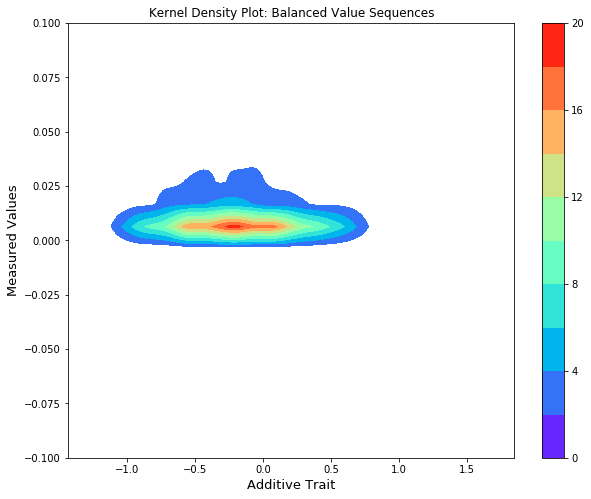

In [11]:
import matplotlib.pyplot as pl
import seaborn as sns

figure_size = [10,8]
pl.figure(figsize=figure_size)

#ax = sns.kdeplot(rna_linear_trait, np.log(rna_true_labels+1e-10),gridsize=200, shade = True, cmap = "rainbow",cbar=True)
ax = sns.kdeplot(-rna_linear_trait_full, rna_true_labels_full, shade = True, cmap = "rainbow",cbar=True)
#ax.patch.set_facecolor('white')
ax.collections[0].set_alpha(0.0)
ax.set_xlabel('Additive Trait', fontsize = 13)
ax.set_ylabel('Measured Values', fontsize = 13)
ax.set_title('Kernel Density Plot: Balanced Value Sequences')
#pl.xlim(-2, 2)
#figure_size = [10,8]
#fig.figure(figsize=figure_size)
#pl.ylim([-10, 2])
#pl.scatter(eval_model_df['val'],np.log(rna_true_labels),s=10,alpha=0.9,color='gray', zorder=1)
#pl.xlabel('Additive Trait', fontsize = 13)
#pl.ylabel('Measured Values', fontsize = 13)
pl.ylim([-0.1,0.1])
pl.show()

In [16]:
import os
os.getcwd()

'/Users/tareen/Desktop/Desktop_Tests/MPathic3/mpathic/data/rnap_convnet/ANN_Logisitc_Regression'

<Figure size 720x576 with 0 Axes>

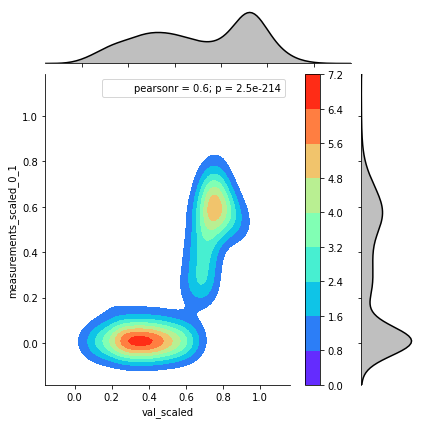

In [105]:
import matplotlib.pyplot as pl
import seaborn as sns

figure_size = [10,8]
pl.figure(figsize=figure_size)

#ax = sns.kdeplot(rna_linear_trait, np.log(rna_true_labels+1e-10),gridsize=200, shade = True, cmap = "rainbow",cbar=True)
#ax = sns.kdeplot(rna_linear_trait, rna_true_labels,gridsize=200, shade = True, cmap = "rainbow",cbar=True)
ax = sns.jointplot(x=rna_linear_trait, y=rna_true_labels, kind='kde',cmap='rainbow',cbar=True,shade=True,shade_lowest=False,color='k')



#ax.patch.set_facecolor('white')
#ax.collections[0].set_alpha(0.0)
#pl.xlabel('Additive Trait', fontsize = 13)
#pl.ylabel('Measured Values', fontsize = 13)
#pl.title('Kernel Density Plot: Balanced Value Sequences')
pl.show()


/Users/tareen/Library/Python/3.6/lib/python/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/tareen/Library/Python/3.6/lib/python/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


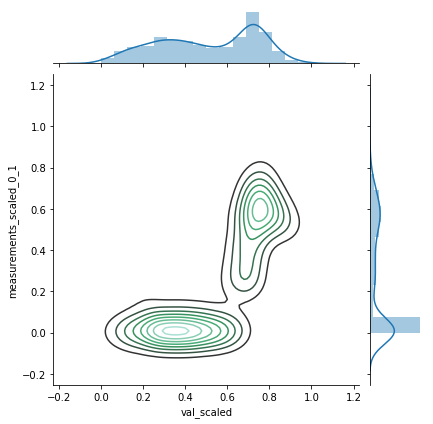

In [13]:
g = sns.JointGrid(x=rna_linear_trait, y=rna_true_labels) 
g.plot_joint(sns.kdeplot) 
g.plot_marginals(sns.distplot)

# Marginal Plots

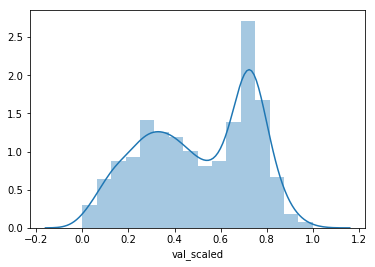

In [96]:
import warnings
warnings.filterwarnings('ignore')

sns.distplot(rna_linear_trait)

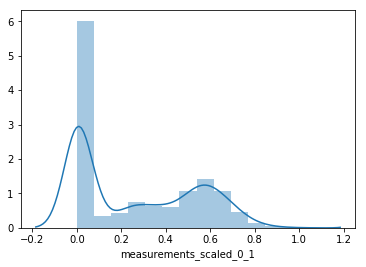

In [97]:
sns.distplot(rna_true_labels)

In [7]:
np.outer(rna_true_labels,rna_linear_trait)


array([[5.94645263e-01, 6.01764035e-01, 6.00610510e-01, ...,
        2.29863783e-01, 1.52478117e-01, 3.15876399e-01],
       [5.95422504e-01, 6.02550581e-01, 6.01395549e-01, ...,
        2.30164231e-01, 1.52677416e-01, 3.16289271e-01],
       [5.64104554e-01, 5.70857710e-01, 5.69763430e-01, ...,
        2.18058085e-01, 1.44646911e-01, 2.99653132e-01],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.46946744e-03, 1.48705911e-03, 1.48420856e-03, ...,
        5.68031678e-04, 3.76798812e-04, 7.80583171e-04],
       [9.36240618e-04, 9.47448786e-04, 9.45632616e-04, ...,
        3.61909569e-04, 2.40069526e-04, 4.97332332e-04]])

### Get data of marginal distribution

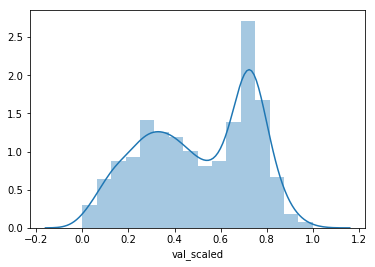

In [98]:
marginal_x = sns.distplot(rna_linear_trait).get_lines()[0].get_data()[1]
marginal_x_scaled = (marginal_x-min(marginal_x))/(max(marginal_x)-min(marginal_x))

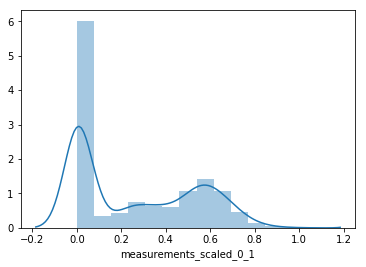

In [99]:
marginal_y = sns.distplot(rna_true_labels).get_lines()[0].get_data()[1]
marginal_y_scaled = (marginal_y-min(marginal_y))/(max(marginal_y)-min(marginal_y))

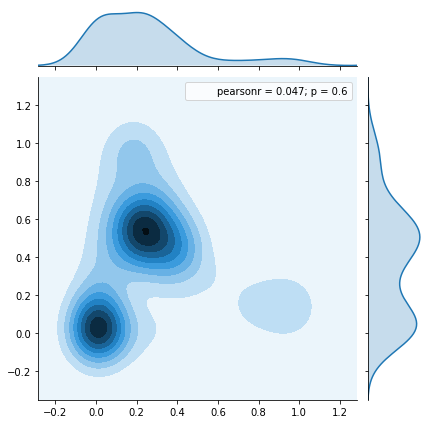

In [102]:
#pl.plot(marginal_x)
#pl.plot(marginal_y)
#pl.hist2d(-marginal_x,marginal_y,cmap='gray_r')
#g = sns.jointplot(x=marginal_x,y=marginal_y,kind='kde')
g = sns.jointplot(y=(marginal_x-min(marginal_x))/(max(marginal_x)-min(marginal_x)),x=(marginal_y-min(marginal_y))/(max(marginal_y)-min(marginal_y)),kind='kde')

#g = sns.jointplot(x=marginal_x_scaled,y=marginal_x_scaled,kind='kde')
#g.ax_marg_x.set_axis_off()
#g.ax_marg_y.set_axis_off()
#pl.title('Joint Plot')
#pl.show()

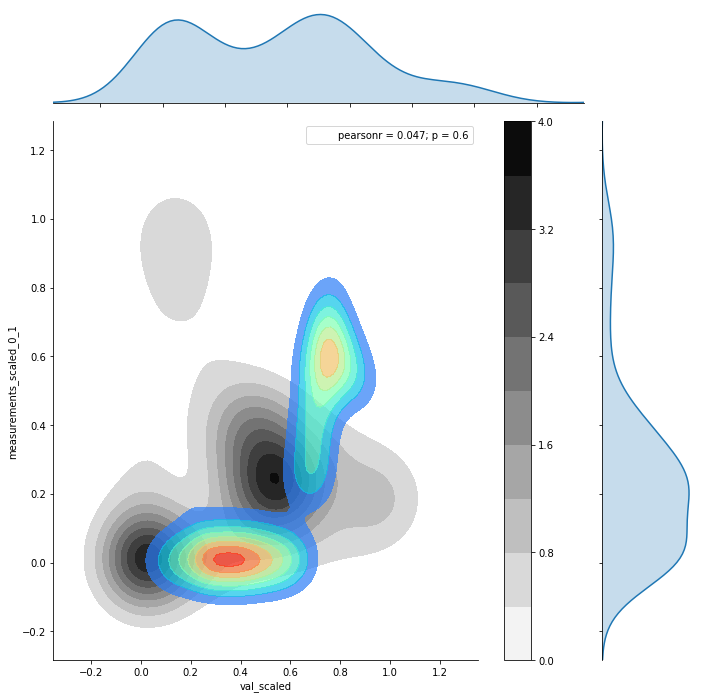

In [116]:
g = sns.jointplot(x=(marginal_x-min(marginal_x))/(max(marginal_x)-min(marginal_x)),
                  y=(marginal_y-min(marginal_y))/(max(marginal_y)-min(marginal_y)),kind='kde',cmap='gray_r',
                  shade=True, shade_lowest=False,cbar=True)

g.x = rna_linear_trait
g.y = rna_true_labels

g.fig.set_figwidth(10)
g.fig.set_figheight(10)


#ax = sns.kdeplot(rna_linear_trait, rna_true_labels, shade=True)
#ax.set(xlim=(None, 6), aspect="equal")
#ax.collections[0].set_alpha(0)

g.plot_joint(sns.kdeplot,cmap='rainbow',shade=True,shade_lowest=False,alpha=0.7)


In [93]:
g.fig.savefig('p_joint_and_p_independent.pdf')

In [38]:
import os
os.getcwd()

'/Users/tareen/Desktop/Desktop_Tests/MPathic3/mpathic/data/rnap_convnet/ANN_Logisitc_Regression/global_epistasis_RNA_splicing/balanced_set_rna_results/notebook_backup_paths_may_not_work'